<a href="https://colab.research.google.com/github/irwanmazlin/Data-Analysis/blob/Master/smart_phone_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)




In [36]:
data = pd.read_csv('/content/drive/MyDrive/Madam Khusyairi PhD Study/Mobile phone price.csv')
data

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [37]:
data.select_dtypes(include='object').nunique()

Brand                    16
Model                   239
Storage                  13
RAM                      20
Screen Size (inches)     41
Camera (MP)             143
Price ($)                89
dtype: int64

In [38]:
data.shape

(407, 8)

In [39]:
data.drop(columns='Model', inplace=True)
data.shape

(407, 7)

In [40]:
data['Price ($)'] = data['Price ($)'].str.replace(',', '').str.replace('$', '')
data['new Price ($)'] = pd.to_numeric(data['Price ($)'])
data.head()

<ipython-input-40-9780fe9f724d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price ($)'] = data['Price ($)'].str.replace(',', '').str.replace('$', '')


,Brand,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),new Price ($)
0,Apple,128 GB,6 GB,6.1,12 + 12 + 12,3095,999,999
1,Samsung,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199,1199
2,OnePlus,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899,899
3,Xiaomi,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279,279
4,Google,128 GB,8 GB,6.4,50 + 12.2,4614,799,799


# Exploratory Data Analysis


In [41]:
data.dtypes

Brand                     object
Storage                   object
RAM                       object
Screen Size (inches)      object
Camera (MP)               object
Battery Capacity (mAh)     int64
Price ($)                 object
new Price ($)              int64
dtype: object

In [42]:
data['Brand'].unique()

array(['Apple', 'Samsung', 'OnePlus', 'Xiaomi', 'Google', 'Oppo', 'Vivo',
       'Realme', 'Motorola', 'Nokia', 'Sony', 'LG', 'Asus', 'Blackberry',
       'CAT', 'Huawei'], dtype=object)

In [43]:
def segment_brand(brand):
  if pd.isnull(brand):
    return 'Unknown'
  elif 'Samsung' in brand or 'OnePlus' in brand or 'Xiaomi' in brand or 'Google' in brand or 'Oppo' in brand or 'Realme' in brand or 'Motorola' in brand or 'Nokia' in brand or 'Sony' in brand or 'LG' in brand or 'Asus' in brand or 'Blackberry' in brand or 'CAT' in brand or 'Huawei' in brand:
    return 'Android'
  elif 'Apple' in brand:
    return 'Apple'




data['new Brand'] = data['Brand'].apply(segment_brand)



<Axes: >

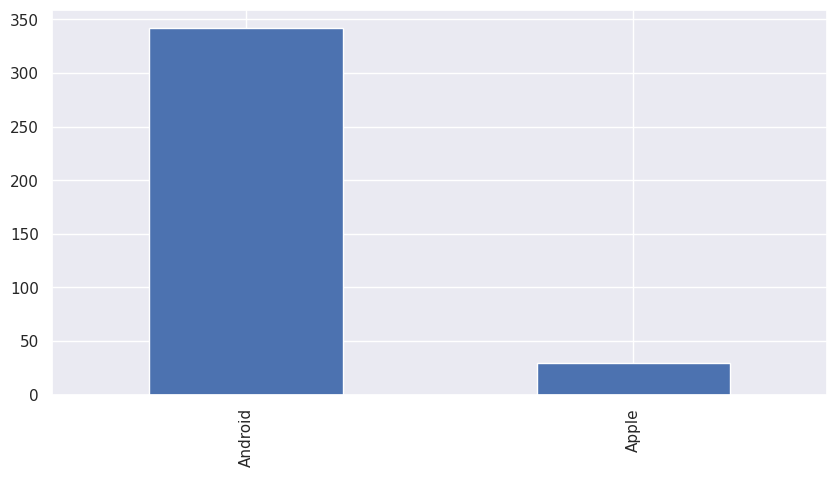

In [44]:
plt.figure(figsize = (10, 5))
data['new Brand'].value_counts().plot(kind='bar')

In [52]:
data['Battery Capacity (mAh)'].dtypes

dtype('int64')

In [46]:
def segment_battery_types(battery):
  if pd.isnull(battery):
    return 'Unknown'
  elif battery > 4000:
    return 'high end'
  else:
    return 'lower end'

data['new battery'] = data['Battery Capacity (mAh)'].apply(segment_battery_types)

In [47]:
data.dtypes

Brand                     object
Storage                   object
RAM                       object
Screen Size (inches)      object
Camera (MP)               object
Battery Capacity (mAh)     int64
Price ($)                 object
new Price ($)              int64
new Brand                 object
new battery               object
dtype: object

In [48]:
data['new battery'].head()

0    lower end
1     high end
2     high end
3     high end
4     high end
Name: new battery, dtype: object

<Axes: >

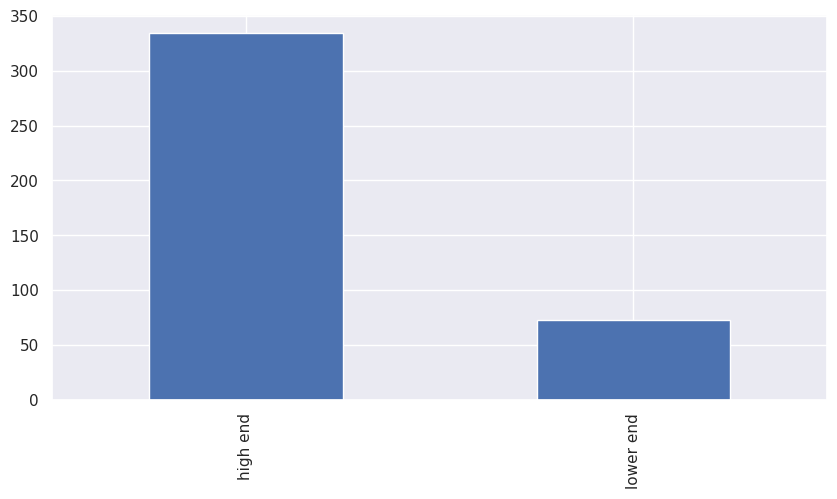

In [49]:
plt.figure(figsize = (10, 5))
data['new battery'].value_counts().plot(kind='bar')

In [55]:
data['Screen Size (inches)']

data['new Screen Size'] = pd.to_numeric(data['Screen Size (inches)'], errors = "coerce")

In [56]:
def segment_screen(screen):
  # if pd.isnull(screen):
  #   return "Unknown"
  # elif (screen > 4) and (screen < 6):
  #   return "smoll"
  # elif screen >6 and screen < 7:
  #   return "medium"
  # elif screen > 7 and screen < 9:
  #   return "big big" 

  if pd.isnull(screen):
    return "Unknown"
  elif screen > 5 and screen < 6:
    return "smoll"
  elif screen > 6 and screen < 7:
    return "medium"
  elif screen > 7:
    return "big big"
  

# data['new Screen Size (inches)'] = float(data['Screen Size (inches)']).apply(segment_screen)
data['new Screen Size (inches)'] = data['new Screen Size'].apply(segment_screen)

<Axes: >

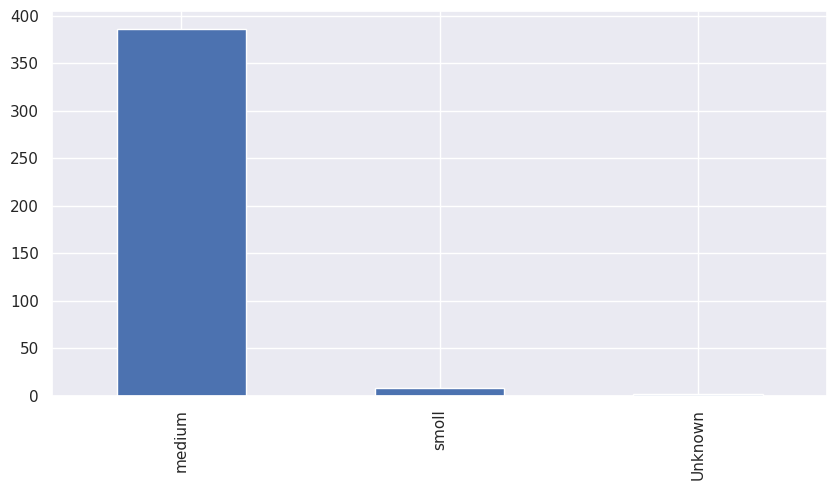

In [58]:
plt.figure(figsize = (10, 5))
data['new Screen Size (inches)'].value_counts().plot(kind='bar')

#To do

predict price using machine learning algorithm